# 3장. 텐서플러 2.0 시작하기 (P.31~)

In [2]:
import tensorflow as tf
print(tf.__version__)

2.0.0-alpha0


In [7]:
#3.3.1 난수생성

rand = tf.random.uniform([1], 0, 1) #균일분포
print(rand)
rand = tf.random.uniform([4], 0, 1) #균일분포, 다른 shape
print(rand)
rand = tf.random.normal([4], 0, 1) #정규분포(음수 포함이 특징)
print(rand)

tf.Tensor([0.5231029], shape=(1,), dtype=float32)
tf.Tensor([0.87385094 0.79840434 0.41524065 0.08318651], shape=(4,), dtype=float32)
tf.Tensor([-0.423842  -0.2822013 -1.0930612  0.8948798], shape=(4,), dtype=float32)


In [4]:
#3.3.2 뉴런 만들기

import math
def sigmoid(x):
    return 1/(1+math.exp(-x))
x = 1; 
y = 0; 
w = tf.random.normal([1], 0, 1);
o = sigmoid(x*w) #output
print(o)

0.44410287078461247


In [16]:
#경사하강법 추가
for i in range(1000):
    o = sigmoid(x*w)
    e = y - o
    w = w + x * 0.1 * e #learning rate: 0.1
    if i%100 == 99:
        print(i, e, o) #e는 작아지고, o는 y에 가까워짐

99 -0.009395217078296242 0.009395217078296242
199 -0.008594630619343065 0.008594630619343065
299 -0.007919334347794073 0.007919334347794073
399 -0.00734209665899633 0.00734209665899633
499 -0.006843058080813633 0.006843058080813633
599 -0.006407365996981397 0.006407365996981397
699 -0.006023687426330509 0.006023687426330509
799 -0.005683246764232643 0.005683246764232643
899 -0.00537913603207922 0.00537913603207922
999 -0.005105853370135653 0.005105853370135653


In [17]:
#x,y값 변경한 뉴런
x = 0; 
y = 1; 
w = tf.random.normal([1], 0, 1);

for i in range(1000):
    o = sigmoid(x*w)
    e = y - o
    w = w + x * 0.1 * e #w,o값이 업데이트 되지 못하는 이유: x=0
    if i%100 == 99:
        print(i, e, o) #편향이 필요한 이유

99 0.5 0.5
199 0.5 0.5
299 0.5 0.5
399 0.5 0.5
499 0.5 0.5
599 0.5 0.5
699 0.5 0.5
799 0.5 0.5
899 0.5 0.5
999 0.5 0.5


In [19]:
#편향 추가
x = 0; 
y = 1; 
w = tf.random.normal([1], 0, 1);
b = tf.random.normal([1], 0, 1);

for i in range(1000):
    o = sigmoid(x*w + 1*b) #편향추가!
    e = y - o
    w = w + x * 0.1 * e 
    b = b + 1 * 0.1 * e #편향도 업데이트
    
    if i%100 == 99:
        print(i, e, o) 

99 0.10042516591454931 0.8995748340854507
199 0.051873742732311934 0.9481262572676881
299 0.03463116751045159 0.9653688324895484
399 0.02591265434640533 0.9740873456535947
499 0.02067344138304883 0.9793265586169512
599 0.017184470749150194 0.9828155292508498
699 0.014697003481706217 0.9853029965182938
799 0.012835259839539703 0.9871647401604603
899 0.011390136706529885 0.9886098632934701
999 0.010236183558293033 0.989763816441707


In [24]:
np.array([0.2, 0.3]) * np.array([0.1, 0.2]) #element-wise

array([0.02, 0.06])

In [25]:
np.sum(np.array([0.2, 0.3]) * np.array([0.1, 0.2]))

0.08

In [21]:
#3.3.3 첫 번째 신경망 네트워크:AND

import numpy as np
 
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [0], [0], [0]])
w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1 #####왜 1?
for i in range(2000):
    e_sum = 0
    for j in range(4):
        o = sigmoid(np.sum(x[j]*w) + b_x*b)
        e = y[j][0] - o
        w = w + x[j]*0.1*e
        b = b + b_x*0.1*e
        e_sum += e
    
    if i%200 == 199:
        print(i, e_sum) #e_sum이 점차 감소


199 -0.11823103090729717
399 -0.06840701329015322
599 -0.04804247660252148
799 -0.036910561778042264
999 -0.029909822498430154
1199 -0.025110373947388083
1399 -0.021621143050679477
1599 -0.01897407741499487
1799 -0.01689589615064097
1999 -0.015225177502833863


In [26]:
# 학습된 w,b로 값 예측

for i in range(4):
    print('X: ', x[i], 'Y: ', y[i], 'Output: ', sigmoid(np.sum(x[i]*w) + b))

X:  [1 1] Y:  [1] Output:  0.9644566813236105
X:  [1 0] Y:  [0] Output:  0.02518518599558183
X:  [0 1] Y:  [0] Output:  0.02526315339182315
X:  [0 0] Y:  [0] Output:  2.467673799378661e-05


In [5]:
#3.3.4 두 번째 신경망 네트워크:OR

import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[1], [1], [1], [0]])              
w = tf.random.normal([2], 0, 1)
b = tf.random.normal([1], 0, 1)
b_x = 1

for i in range(2000):
    error_sum = 0
    for j in range(4):
        output = sigmoid(np.sum(x[j]*w) + b_x*b)
        error = y[j][0] - output
        w = w + x[j] * 0.1 * error
        b = b + b_x * 0.1 * error
        error_sum += error
    if i%200 == 199: print(i, error_sum)

199 -0.0463076163846233
399 -0.02493601302274212
599 -0.016958897502412376
799 -0.012806330797793392
999 -0.010269505958635336
1199 -0.008563032792299953
1399 -0.007338348754900519
1599 -0.006417059378623871
1799 -0.005700493330530656
1999 -0.005125219416675569


In [8]:
#학습된 w,b로 OR실험 -> 정답과 유사
for i in range(4):
    print('X: ', x[i], ', Y: ', y[i], ', Output: ', sigmoid(np.sum(x[i]*w)+b))

X:  [1 1] , Y:  [1] , Output:  0.9999972452897788
X:  [1 0] , Y:  [1] , Output:  0.9898421721206906
X:  [0 1] , Y:  [1] , Output:  0.9898101241695616
X:  [0 0] , Y:  [0] , Output:  0.025412441588112244


In [9]:
# XOR 문제: 한 퍼셉트론으로는 XOR연산자를 구현불가능 -> 여러 퍼셉트론을 사용하면 어떤 불린 함수도 구현 가능!

# 세 퍼셉트론으로 XOR 구현
import numpy as np
x = np.array([[1,1], [1,0], [0,1], [0,0]])
y = np.array([[0], [1], [1], [0]])

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1), loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(x, y, epochs=2000, batch_size=1)

Epoch 1/2000
4/4 [==============================] - 0s 29ms/sample - loss: 0.2626
Epoch 2/2000
4/4 [==============================] - 0s 789us/sample - loss: 0.2614
Epoch 3/2000
4/4 [==============================] - 0s 865us/sample - loss: 0.2605
Epoch 4/2000
4/4 [==============================] - 0s 904us/sample - loss: 0.2596
Epoch 5/2000
4/4 [==============================] - 0s 755us/sample - loss: 0.2588
Epoch 6/2000
4/4 [==============================] - 0s 775us/sample - loss: 0.2583
Epoch 7/2000
4/4 [==============================] - 0s 741us/sample - loss: 0.2577
Epoch 8/2000
4/4 [==============================] - 0s 742us/sample - loss: 0.2573
Epoch 9/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2570
Epoch 10/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2567
Epoch 11/2000
4/4 [==============================] - 0s 962us/sample - loss: 0.2563
Epoch 12/2000
4/4 [==============================] - 0s 720us/sample - loss: 0.2560
Epoch 

4/4 [==============================] - 0s 1ms/sample - loss: 0.2535
Epoch 196/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2536
Epoch 197/2000
4/4 [==============================] - 0s 914us/sample - loss: 0.2535
Epoch 198/2000
4/4 [==============================] - 0s 940us/sample - loss: 0.2535
Epoch 199/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.2535
Epoch 200/2000
4/4 [==============================] - 0s 847us/sample - loss: 0.2535
Epoch 201/2000
4/4 [==============================] - 0s 870us/sample - loss: 0.2535
Epoch 202/2000
4/4 [==============================] - 0s 983us/sample - loss: 0.2535
Epoch 203/2000
4/4 [==============================] - 0s 801us/sample - loss: 0.2535
Epoch 204/2000
4/4 [==============================] - 0s 847us/sample - loss: 0.2535
Epoch 205/2000
4/4 [==============================] - 0s 790us/sample - loss: 0.2535
Epoch 206/2000
4/4 [==============================] - 0s 933us/sample - loss: 0.2535
E

4/4 [==============================] - 0s 791us/sample - loss: 0.2519
Epoch 388/2000
4/4 [==============================] - 0s 932us/sample - loss: 0.2519
Epoch 389/2000
4/4 [==============================] - 0s 997us/sample - loss: 0.2518
Epoch 390/2000
4/4 [==============================] - 0s 738us/sample - loss: 0.2518
Epoch 391/2000
4/4 [==============================] - 0s 775us/sample - loss: 0.2518
Epoch 392/2000
4/4 [==============================] - 0s 978us/sample - loss: 0.2518
Epoch 393/2000
4/4 [==============================] - 0s 843us/sample - loss: 0.2517
Epoch 394/2000
4/4 [==============================] - 0s 778us/sample - loss: 0.2518
Epoch 395/2000
4/4 [==============================] - 0s 818us/sample - loss: 0.2518
Epoch 396/2000
4/4 [==============================] - 0s 847us/sample - loss: 0.2517
Epoch 397/2000
4/4 [==============================] - 0s 822us/sample - loss: 0.2517
Epoch 398/2000
4/4 [==============================] - 0s 782us/sample - loss: 0.

4/4 [==============================] - 0s 703us/sample - loss: 0.2471
Epoch 580/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.2470
Epoch 581/2000
4/4 [==============================] - 0s 795us/sample - loss: 0.2470
Epoch 582/2000
4/4 [==============================] - 0s 689us/sample - loss: 0.2470
Epoch 583/2000
4/4 [==============================] - 0s 776us/sample - loss: 0.2469
Epoch 584/2000
4/4 [==============================] - 0s 701us/sample - loss: 0.2469
Epoch 585/2000
4/4 [==============================] - 0s 853us/sample - loss: 0.2468
Epoch 586/2000
4/4 [==============================] - 0s 759us/sample - loss: 0.2468
Epoch 587/2000
4/4 [==============================] - 0s 770us/sample - loss: 0.2467
Epoch 588/2000
4/4 [==============================] - 0s 760us/sample - loss: 0.2467
Epoch 589/2000
4/4 [==============================] - 0s 747us/sample - loss: 0.2466
Epoch 590/2000
4/4 [==============================] - 0s 767us/sample - loss: 0.

4/4 [==============================] - 0s 978us/sample - loss: 0.2356
Epoch 772/2000
4/4 [==============================] - 0s 758us/sample - loss: 0.2355
Epoch 773/2000
4/4 [==============================] - 0s 746us/sample - loss: 0.2354
Epoch 774/2000
4/4 [==============================] - 0s 787us/sample - loss: 0.2353
Epoch 775/2000
4/4 [==============================] - 0s 867us/sample - loss: 0.2353
Epoch 776/2000
4/4 [==============================] - 0s 902us/sample - loss: 0.2352
Epoch 777/2000
4/4 [==============================] - 0s 709us/sample - loss: 0.2351
Epoch 778/2000
4/4 [==============================] - 0s 780us/sample - loss: 0.2350
Epoch 779/2000
4/4 [==============================] - 0s 898us/sample - loss: 0.2349
Epoch 780/2000
4/4 [==============================] - 0s 734us/sample - loss: 0.2348
Epoch 781/2000
4/4 [==============================] - 0s 670us/sample - loss: 0.2348
Epoch 782/2000
4/4 [==============================] - 0s 808us/sample - loss: 0.

4/4 [==============================] - 0s 799us/sample - loss: 0.2160
Epoch 964/2000
4/4 [==============================] - 0s 828us/sample - loss: 0.2159
Epoch 965/2000
4/4 [==============================] - 0s 912us/sample - loss: 0.2158
Epoch 966/2000
4/4 [==============================] - 0s 832us/sample - loss: 0.2156
Epoch 967/2000
4/4 [==============================] - 0s 801us/sample - loss: 0.2155
Epoch 968/2000
4/4 [==============================] - 0s 755us/sample - loss: 0.2155
Epoch 969/2000
4/4 [==============================] - 0s 922us/sample - loss: 0.2153
Epoch 970/2000
4/4 [==============================] - 0s 895us/sample - loss: 0.2152
Epoch 971/2000
4/4 [==============================] - 0s 817us/sample - loss: 0.2151
Epoch 972/2000
4/4 [==============================] - 0s 807us/sample - loss: 0.2150
Epoch 973/2000
4/4 [==============================] - 0s 879us/sample - loss: 0.2148
Epoch 974/2000
4/4 [==============================] - 0s 878us/sample - loss: 0.

4/4 [==============================] - 0s 946us/sample - loss: 0.1947
Epoch 1154/2000
4/4 [==============================] - 0s 992us/sample - loss: 0.1946
Epoch 1155/2000
4/4 [==============================] - 0s 877us/sample - loss: 0.1945
Epoch 1156/2000
4/4 [==============================] - 0s 794us/sample - loss: 0.1944
Epoch 1157/2000
4/4 [==============================] - 0s 935us/sample - loss: 0.1943
Epoch 1158/2000
4/4 [==============================] - 0s 949us/sample - loss: 0.1941
Epoch 1159/2000
4/4 [==============================] - 0s 794us/sample - loss: 0.1940
Epoch 1160/2000
4/4 [==============================] - 0s 711us/sample - loss: 0.1940
Epoch 1161/2000
4/4 [==============================] - 0s 863us/sample - loss: 0.1938
Epoch 1162/2000
4/4 [==============================] - 0s 800us/sample - loss: 0.1938
Epoch 1163/2000
4/4 [==============================] - 0s 908us/sample - loss: 0.1937
Epoch 1164/2000
4/4 [==============================] - 0s 778us/sample

4/4 [==============================] - 0s 957us/sample - loss: 0.1757
Epoch 1344/2000
4/4 [==============================] - 0s 753us/sample - loss: 0.1756
Epoch 1345/2000
4/4 [==============================] - 0s 769us/sample - loss: 0.1755
Epoch 1346/2000
4/4 [==============================] - 0s 806us/sample - loss: 0.1754
Epoch 1347/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1753
Epoch 1348/2000
4/4 [==============================] - 0s 986us/sample - loss: 0.1752
Epoch 1349/2000
4/4 [==============================] - 0s 894us/sample - loss: 0.1751
Epoch 1350/2000
4/4 [==============================] - 0s 823us/sample - loss: 0.1750
Epoch 1351/2000
4/4 [==============================] - 0s 927us/sample - loss: 0.1749
Epoch 1352/2000
4/4 [==============================] - 0s 875us/sample - loss: 0.1748
Epoch 1353/2000
4/4 [==============================] - 0s 871us/sample - loss: 0.1746
Epoch 1354/2000
4/4 [==============================] - 0s 811us/sample -

4/4 [==============================] - 0s 831us/sample - loss: 0.1529
Epoch 1534/2000
4/4 [==============================] - 0s 949us/sample - loss: 0.1528
Epoch 1535/2000
4/4 [==============================] - 0s 731us/sample - loss: 0.1526
Epoch 1536/2000
4/4 [==============================] - 0s 926us/sample - loss: 0.1525
Epoch 1537/2000
4/4 [==============================] - 0s 772us/sample - loss: 0.1523
Epoch 1538/2000
4/4 [==============================] - 0s 812us/sample - loss: 0.1522
Epoch 1539/2000
4/4 [==============================] - 0s 818us/sample - loss: 0.1520
Epoch 1540/2000
4/4 [==============================] - 0s 815us/sample - loss: 0.1518
Epoch 1541/2000
4/4 [==============================] - 0s 792us/sample - loss: 0.1517
Epoch 1542/2000
4/4 [==============================] - 0s 991us/sample - loss: 0.1515
Epoch 1543/2000
4/4 [==============================] - 0s 796us/sample - loss: 0.1514
Epoch 1544/2000
4/4 [==============================] - 0s 722us/sample

4/4 [==============================] - 0s 821us/sample - loss: 0.1164
Epoch 1724/2000
4/4 [==============================] - 0s 750us/sample - loss: 0.1161
Epoch 1725/2000
4/4 [==============================] - 0s 864us/sample - loss: 0.1159
Epoch 1726/2000
4/4 [==============================] - 0s 882us/sample - loss: 0.1157
Epoch 1727/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1154
Epoch 1728/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1152
Epoch 1729/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.1150
Epoch 1730/2000
4/4 [==============================] - 0s 977us/sample - loss: 0.1147
Epoch 1731/2000
4/4 [==============================] - 0s 999us/sample - loss: 0.1145
Epoch 1732/2000
4/4 [==============================] - 0s 998us/sample - loss: 0.1143
Epoch 1733/2000
4/4 [==============================] - 0s 865us/sample - loss: 0.1140
Epoch 1734/2000
4/4 [==============================] - 0s 793us/sample - los

4/4 [==============================] - 0s 738us/sample - loss: 0.0726
Epoch 1914/2000
4/4 [==============================] - 0s 1ms/sample - loss: 0.0724
Epoch 1915/2000
4/4 [==============================] - 0s 851us/sample - loss: 0.0723
Epoch 1916/2000
4/4 [==============================] - 0s 767us/sample - loss: 0.0720
Epoch 1917/2000
4/4 [==============================] - 0s 735us/sample - loss: 0.0718
Epoch 1918/2000
4/4 [==============================] - 0s 944us/sample - loss: 0.0716
Epoch 1919/2000
4/4 [==============================] - 0s 853us/sample - loss: 0.0714
Epoch 1920/2000
4/4 [==============================] - 0s 769us/sample - loss: 0.0712
Epoch 1921/2000
4/4 [==============================] - 0s 793us/sample - loss: 0.0710
Epoch 1922/2000
4/4 [==============================] - 0s 939us/sample - loss: 0.0708
Epoch 1923/2000
4/4 [==============================] - 0s 776us/sample - loss: 0.0706
Epoch 1924/2000
4/4 [==============================] - 0s 770us/sample -

In [21]:
model.predict(x)

array([[0.3215145 ],
       [0.7803397 ],
       [0.7799766 ],
       [0.14832008]], dtype=float32)

In [22]:
for weight in model.weights:
    print(weight)

<tf.Variable 'dense/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-4.7583785, -2.2540727],
       [-4.8372583, -2.2695644]], dtype=float32)>
<tf.Variable 'dense/bias:0' shape=(2,) dtype=float32, numpy=array([1.2839661, 3.0609038], dtype=float32)>
<tf.Variable 'dense_1/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[-5.520663],
       [ 4.328708]], dtype=float32)>
<tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-1.559477], dtype=float32)>


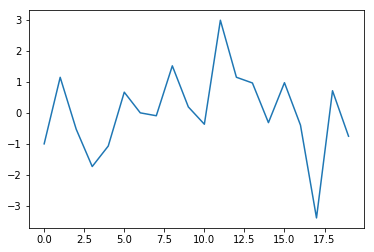

In [76]:
import matplotlib.pyplot as plt

x = range(20)
y = tf.random.normal([20], 0, 1)
plt.plot(x, y)
plt.show()

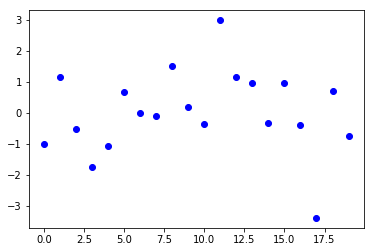

In [77]:
plt.plot(x, y, 'bo')
plt.show()

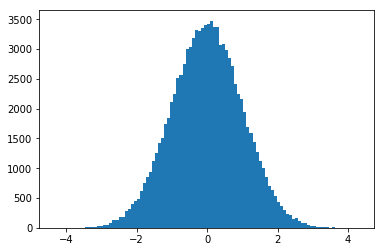

In [78]:
random_normal = tf.random.normal([100000], 0, 1)
plt.hist(random_normal, bins=100)
plt.show()

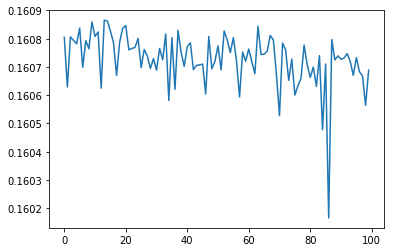

In [80]:
plt.plot(history.history['loss'])